In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [8]:
diabetic7 = pd.read_csv("./dataset_diabetes/diabetic7.csv")

In [9]:
diabetic7.shape

(84432, 44)

In [10]:
diabetic7.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'citoglipton', 'insulin',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'target', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'medical_specialty_new',
       'discharge_id', 'admission_id'],
      dtype='object')

In [11]:
diabetic7 = diabetic7.drop(['admission_type_id'], axis=1)

In [12]:
diabetic7.dtypes

race                      object
gender                    object
age                       object
time_in_hospital           int64
num_lab_procedures         int64
num_procedures             int64
num_medications            int64
number_outpatient          int64
number_emergency           int64
number_inpatient           int64
number_diagnoses           int64
max_glu_serum             object
A1Cresult                 object
metformin                 object
repaglinide               object
nateglinide               object
chlorpropamide            object
acetohexamide             object
glipizide                 object
glyburide                 object
tolbutamide               object
pioglitazone              object
rosiglitazone             object
acarbose                  object
miglitol                  object
citoglipton               object
insulin                   object
metformin-pioglitazone    object
change                    object
diabetesMed               object
target    

In [13]:
le = preprocessing.LabelEncoder()

In [14]:
categorical = diabetic7.select_dtypes(include = ["object"]).columns
numerical = diabetic7.select_dtypes(exclude = ["object"]).columns
print("Number of Categorical features: " + str(len(categorical)))
print("Number of Numerical features: " + str(len(numerical)))
diabetic7_categorical = diabetic7[categorical]
diabetic7_numerical = diabetic7[numerical]

Number of Categorical features: 28
Number of Numerical features: 15


In [15]:
categorical= list(categorical)
numerical = list(numerical)

In [16]:
for i in categorical:
    diabetic7[i] = le.fit_transform(diabetic7[i])

In [17]:
diabetic7.dtypes

race                      int64
gender                    int64
age                       int64
time_in_hospital          int64
num_lab_procedures        int64
num_procedures            int64
num_medications           int64
number_outpatient         int64
number_emergency          int64
number_inpatient          int64
number_diagnoses          int64
max_glu_serum             int64
A1Cresult                 int64
metformin                 int64
repaglinide               int64
nateglinide               int64
chlorpropamide            int64
acetohexamide             int64
glipizide                 int64
glyburide                 int64
tolbutamide               int64
pioglitazone              int64
rosiglitazone             int64
acarbose                  int64
miglitol                  int64
citoglipton               int64
insulin                   int64
metformin-pioglitazone    int64
change                    int64
diabetesMed               int64
target                    int64
self_pay

In [213]:
diabetic7.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'acetohexamide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'citoglipton', 'insulin', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'target', 'self_pay', 'medicaid/medicare',
       'coverByInsurance', 'f_diag', 's_diag', 't_diag', 'clustering3',
       'clustering4', 'clustering2', 'medical_specialty_new', 'discharge_id',
       'admission_id'],
      dtype='object')

In [18]:
answer = diabetic7['target']
diabetic7 = diabetic7.drop(['target'], axis=1)

In [19]:
#divide the dataset into train/test 7:3?
X_train, X_test, y_train, y_test = train_test_split(diabetic7, answer, test_size = 0.3, random_state = 0, stratify=answer, shuffle=True)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (59102, 42)
X_test : (25330, 42)
y_train : (59102,)
y_test : (25330,)


In [20]:
model=XGBClassifier(random_state=0, class_weight = {0:1, 1:8})

In [24]:
n_trees_range = range(10,300, 4)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    model.set_params(n_estimators=n_trees, random_state=42, scale_pos_weight = 8, max_depth=6, n_jobs = -1)
    model.fit(X_train, y_train)
    train_error2.append(1 - model.score(X_train, y_train))
    test_error2.append(1 - model.score(X_test, y_test))

In [17]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 8},
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=66, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=8, seed=None, silent=True,
       subsample=1)>

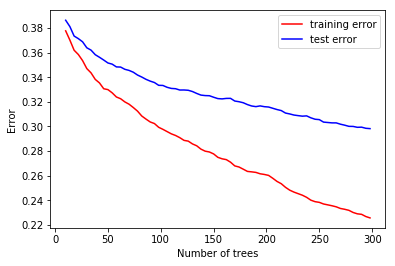

In [25]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [253]:
confusion_matrix(y_train, model.predict(X_train))

array([[33269, 19103],
       [ 2283,  4447]])

In [ ]:
{'reg_alpha': 0.2,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 110,
 'learning_rate': 0.1,

 'subsample': 0.5,
 'n_estimators': 400,
 'min_child_weight': 6,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [259]:
#randomized searchcv to find the range of the hyperparameters of the XGboost


cv = StratifiedKFold(shuffle  = True, n_splits = 4)
n_estimators = [12, 14, 16]
min_samples_split = [2, 5, 10]
min_samples_leaf = min_samples_leaf = [1, 2, 4]
min_child_weight = [1,6,12]
colsample_bytree = [0.1, 0.5, 0.9]
gamma = [0, 0.2, 0.5, 0.8]
learning_rate =  [0.02, 0.06, 0.1] # default 0.1 
max_depth =  [int(x) for x in np.linspace(10, 110, num = 11)]# default 3
subsample =  [0.2, 0.5, 0.9]
reg_alpha=[0.2, 0.4, 0.7, 0.9] 

random_para = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma':gamma,
               'min_child_weight': min_child_weight,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': reg_alpha,
               'njobs': [-1]}

rand_search_rf = RandomizedSearchCV(model, random_para, cv=cv)
rand_search_rf.fit(X_train, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 8},
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [12, 14, 16], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'gamma': [0, 0.2, 0.5, 0.8], 'min_child_weight': [1, 6, 12], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.02, 0.06, 0.1], 'subsample': [0.2, 0.5, 0.9], 'colsample_bytree': [0.1, 0.5, 0.9], 'reg_alpha': [0.2

In [ ]:
#taking risks scores for variables/groups
#take out a hold-out sample of observations
#risk-table - for categories 
#risk features

In [ ]:
#auc - validation easily feasible
#true positive/false positive rates 
#classify a group as risk group -> average of highest and lowest risk groups

In [260]:
rand_search_rf.best_params_

{'subsample': 0.9,
 'reg_alpha': 0.4,
 'njobs': -1,
 'n_estimators': 16,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'min_child_weight': 6,
 'max_depth': 10,
 'learning_rate': 0.06,
 'gamma': 0.8,
 'colsample_bytree': 0.9}

In [8]:
#fit the model and get auc score

In [261]:
#randomized searchcv to find the range of the hyperparameters of the XGboost

cv = StratifiedKFold(shuffle  = True, n_splits = 4)
n_estimators = []
min_child_weight = [1,6,12]
colsample_bytree = [0.9, 0.95,0.99]
gamma = [0.8, 0.9]
learning_rate =  [0.05, 0.06, 0.07] # default 0.1 
max_depth =  range(10,20)# default 3
subsample =  [0.9, 0.99]
reg_alpha=[0.2, 0.4, 0.7, 0.9] 

random_para = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma':gamma,
               'min_child_weight': min_child_weight,
               'min_samples_split': [5],
               'min_samples_leaf': [2],
               'learning_rate': learning_rate,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': [0.4],
               'njobs': [-1]}

rand_search_rf = RandomizedSearchCV(model, random_para, cv=cv)
rand_search_rf.fit(X_train, y_train)
rand_search_rf.best_params_

{'subsample': 0.9,
 'reg_alpha': 0.4,
 'njobs': -1,
 'n_estimators': 16,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'min_child_weight': 6,
 'max_depth': 17,
 'learning_rate': 0.06,
 'gamma': 0.8,
 'colsample_bytree': 0.9}

In [347]:
list(range(7,10))

[7, 8, 9]

In [23]:
###Grid Search
#better practice would be to run randomized searchcv first to narrow down the range
#then run gridsearchcv

#import stratified K fold 
cv = StratifiedKFold(shuffle  = True, n_splits = 4)
scale_pos_weight = [9]
min_samples_split = [4]
min_samples_leaf = [1]
min_child_weight = [7]
colsample_bytree = [0.6]
gamma = [0.8]
learning_rate =  [0.06] # default 0.1 
max_depth =  [5,10,15,20] # default 3
n_estimators = [280,300,320] # default 100
subsample =  [0.9]
reg_alpha=[0.4] 

grid_para = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma':gamma,
               'min_child_weight': min_child_weight,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': reg_alpha,
               'njobs': [-1],
               'scale_pos_weight': scale_pos_weight}
#import stratified K fold 
grid_search_forest = GridSearchCV(model, grid_para, cv=cv , scoring = 'roc_auc') #or roc_auc for scoring
grid_search_forest.fit(X_train, y_train)

bestparam= grid_search_forest.best_params_
bestscore= grid_search_forest.best_score_

In [24]:
bestparam

{'colsample_bytree': 0.6,
 'gamma': 0.8,
 'max_depth': 5,
 'min_child_weight': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 280,
 'njobs': -1,
 'reg_alpha': 0.4,
 'scale_pos_weight': 9,
 'subsample': 0.9}

In [296]:
bestparam1 = bestparam

In [25]:
# Fit the model
model=XGBClassifier(random_state = 0,**bestparam, class_weight = {0:1, 1:8})
#model.set_params(bestparam)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=1, eval_metric="auc", eval_set=eval_set, verbose=True)
model.score(X_test, y_test)

[0]	validation_0-auc:0.56602
Will train until validation_0-auc hasn't improved in 1 rounds.
[1]	validation_0-auc:0.619601
[2]	validation_0-auc:0.630656
[3]	validation_0-auc:0.64927
[4]	validation_0-auc:0.655194
[5]	validation_0-auc:0.65673
[6]	validation_0-auc:0.656228
Stopping. Best iteration:
[5]	validation_0-auc:0.65673



0.5256217923410975

In [362]:
# Fit the model
model=XGBClassifier(random_state = 0,**bestparam, class_weight = {0:1, 1:8})
#model.set_params(bestparam)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["auc", "logloss"], eval_set=eval_set, verbose=True)
model.score(X_test, y_test)

[0]	validation_0-auc:0.762621	validation_0-logloss:0.675108	validation_1-auc:0.554067	validation_1-logloss:0.682131
[1]	validation_0-auc:0.854266	validation_0-logloss:0.653428	validation_1-auc:0.584229	validation_1-logloss:0.668373
[2]	validation_0-auc:0.889859	validation_0-logloss:0.636254	validation_1-auc:0.594783	validation_1-logloss:0.657673
[3]	validation_0-auc:0.921375	validation_0-logloss:0.616901	validation_1-auc:0.605771	validation_1-logloss:0.645289
[4]	validation_0-auc:0.940905	validation_0-logloss:0.595127	validation_1-auc:0.619673	validation_1-logloss:0.63077
[5]	validation_0-auc:0.949564	validation_0-logloss:0.578229	validation_1-auc:0.625426	validation_1-logloss:0.620183
[6]	validation_0-auc:0.959275	validation_0-logloss:0.560882	validation_1-auc:0.62678	validation_1-logloss:0.609981
[7]	validation_0-auc:0.968017	validation_0-logloss:0.544768	validation_1-auc:0.628872	validation_1-logloss:0.600621
[8]	validation_0-auc:0.974612	validation_0-logloss:0.530887	validation_1-a

0.7709040663245164

In [359]:
results = model.evals_result()
print(results)

{'validation_0': {'auc': [0.762621, 0.854266, 0.889859, 0.921375, 0.940905, 0.949564, 0.959275, 0.968017, 0.974612, 0.979111, 0.981031, 0.983525, 0.985317, 0.987402, 0.988812, 0.990894]}, 'validation_1': {'auc': [0.554067, 0.584229, 0.594783, 0.605771, 0.619673, 0.625426, 0.62678, 0.628872, 0.627717, 0.630953, 0.633002, 0.635747, 0.635088, 0.637371, 0.637226, 0.636575]}}


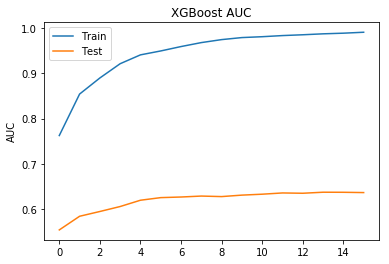

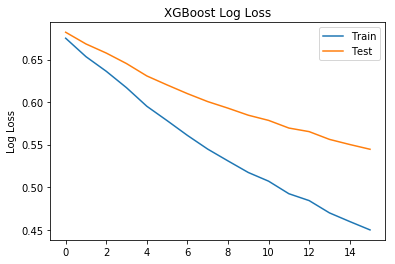

In [363]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
# plot AUC
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, model.predict(X_test))

In [27]:
bestscore

0.6520722967434944

In [28]:
AUC

0.6063614774880094

In [368]:
confusion_matrix(y_test, model.predict(X_test))

array([[17468,  4977],
       [ 1786,  1099]])